In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Lectura del csv
best_seasons = pd.read_csv('BestSeasons.csv')

In [2]:
#Retocada la tabla best seasons
best = best_seasons.copy()
#mental.rename(columns = {'value':'BP per Match'}, inplace = True)
del best['goatPoints']
del best['tournamentGoatPoints']
del best['yearEndRankGoatPoints']
del best['weeksAtNo1GoatPoints']
del best['bigWinsGoatPoints']
del best['grandSlamGoatPoints']
del best['country_name']
del best['active']
del best['weeksAtEloTopNGoatPoints']
del best['bestEloRating']

best

,rank,name,country_id,season,grandSlamTitles,grandSlamFinals,grandSlamSemiFinals,tourFinalsTitles,tourFinalsFinals,mastersTitles,mastersFinals,olympicsTitles,titles,wonLost,yearEndRank,wonPct
0,1,Novak Djokovic,SRB,2015,3,1,0,1,0,6,2,0,11,82-6,1,93.2%
1,2,Rod Laver,AUS,1969,4,0,0,0,0,2,1,0,16,95-14,1,87.2%
2,3,Roger Federer,SUI,2006,3,1,0,1,0,4,2,0,12,92-5,1,94.8%
3,4,John McEnroe,USA,1984,2,1,0,2,0,5,0,0,13,82-3,1,96.5%
4,5,Novak Djokovic (2),SRB,2011,3,0,1,0,0,5,1,0,10,70-6,1,92.1%
5,6,Roger Federer (2),SUI,2007,3,1,0,1,0,2,3,0,8,68-9,1,88.3%
6,7,Roger Federer (3),SUI,2004,3,0,0,1,0,3,0,0,11,74-6,1,92.5%
7,8,Roger Federer (4),SUI,2005,2,0,2,0,1,4,0,0,11,81-4,1,95.3%
8,9,Rafael Nadal,ESP,2010,3,0,0,0,1,3,0,0,7,71-10,1,87.7%
9,10,Ivan Lendl,USA,1986,2,1,0,1,0,4,0,0,9,74-6,1,92.5%


In [3]:
#Mascara para sacar la mejor season de cada uno
big3_best = best[(best['name'] == 'Roger Federer') | (best['name'] == 'Rafael Nadal') | (best['name'] == 'Novak Djokovic')]
big3_best

,rank,name,country_id,season,grandSlamTitles,grandSlamFinals,grandSlamSemiFinals,tourFinalsTitles,tourFinalsFinals,mastersTitles,mastersFinals,olympicsTitles,titles,wonLost,yearEndRank,wonPct
0,1,Novak Djokovic,SRB,2015,3,1,0,1,0,6,2,0,11,82-6,1,93.2%
2,3,Roger Federer,SUI,2006,3,1,0,1,0,4,2,0,12,92-5,1,94.8%
8,9,Rafael Nadal,ESP,2010,3,0,0,0,1,3,0,0,7,71-10,1,87.7%


In [4]:
#Mascara para sacar todas las seasons dentro del top 20 de cada uno
seasons = ['Roger Federer', 'Roger Federer (2)', 'Roger Federer (3)', 'Roger Federer (4)',
           'Rafael Nadal', 'Rafael Nadal (2)',
           'Novak Djokovic', 'Novak Djokovic (2)', 'Novak Djokovic (3)', 'Novak Djokovic (4)', 'Novak Djokovic (5)']
big3_best1 = best[best['name'].isin(seasons)]
big_3_best_seasons = big3_best1.set_index('rank')
big_3_best_seasons

,name,country_id,season,grandSlamTitles,grandSlamFinals,grandSlamSemiFinals,tourFinalsTitles,tourFinalsFinals,mastersTitles,mastersFinals,olympicsTitles,titles,wonLost,yearEndRank,wonPct
rank,,,,,,,,,,,,,,,
1,Novak Djokovic,SRB,2015,3,1,0,1,0,6,2,0,11,82-6,1,93.2%
3,Roger Federer,SUI,2006,3,1,0,1,0,4,2,0,12,92-5,1,94.8%
5,Novak Djokovic (2),SRB,2011,3,0,1,0,0,5,1,0,10,70-6,1,92.1%
6,Roger Federer (2),SUI,2007,3,1,0,1,0,2,3,0,8,68-9,1,88.3%
7,Roger Federer (3),SUI,2004,3,0,0,1,0,3,0,0,11,74-6,1,92.5%
8,Roger Federer (4),SUI,2005,2,0,2,0,1,4,0,0,11,81-4,1,95.3%
9,Rafael Nadal,ESP,2010,3,0,0,0,1,3,0,0,7,71-10,1,87.7%
12,Rafael Nadal (2),ESP,2013,2,0,0,0,1,5,1,0,10,75-7,1,91.5%
13,Novak Djokovic (3),SRB,2012,1,2,1,1,0,3,3,0,6,75-12,1,86.2%


In [5]:
big_3_best_seasons.to_csv('big_3_best_seasons.csv')

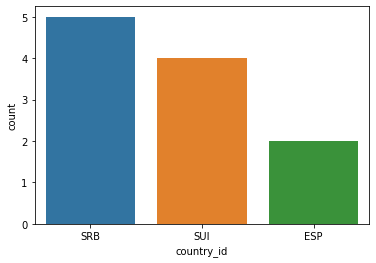

In [6]:
sns.countplot(x=big_3_best_seasons["country_id"]);
#De las 20 mejores temporadas de la historia, han participado en 11 de ellas. Sin tener en cuenta la temporada de Djokovic
#de este año, con la que sumaria 6.

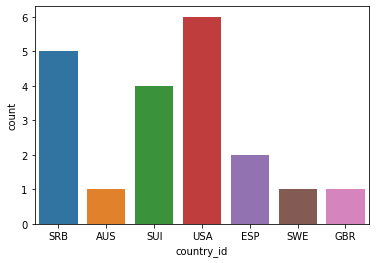

In [7]:
sns.countplot(x=best["country_id"]);

In [8]:
big_3_best_seasons

# create trace1 
trace1 = go.Bar(x = big_3_best_seasons['country_id'],
               y = [5],
               name = 'Novak Djokovic',
               marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = 'Novak Djokovic')
               

trace2 = go.Bar(x = big_3_best_seasons['country_id'],
               y = [2],
               name = 'Rafael Nadal',
               marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = 'Rafael Nadal')

trace3 = go.Bar(x = big_3_best_seasons['country_id'],
               y = [4],
               name = 'Roger Federer',
               marker = dict(color = 'rgba(255, 150, 56, 0.5)',
                            line = dict(color='rgb(0,0,0)', width = 1.5)),
               text = 'Roger Federer')

data = [trace1, trace2, trace3]

layout = go.Layout(barmode = "group", title = 'Big Best Seasons')

fig = go.Figure(data = data, layout = layout)

iplot(fig)